<a href="https://colab.research.google.com/github/Jair-RM/Modelacion-Financiera/blob/main/OC_SMF_POM(21%20Feb).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimización de dos objetivos

*Oliver Cuate*

**21 de febrero de 2025**

----

En este cuaderno de Colab resolvemos el siguiente problema de optimzación con dos objetivos:


$$ \min \; F(x) = \left[ \begin{array}{c} x_1^4 + x_2^2 \\ (x_1-5)^2 + (x_2-5)^4  \end{array} \right] $$

Usando el método de suma de pesos y el método de Newton.


In [19]:
import numpy as np
import matplotlib.pyplot as plt

Definimos la función vectorial

In [20]:
def fun1(x):
  z = np.zeros(2)
  z[0] = x[0]**4 + x[1]**2
  z[1] = (x[0]-5)**2 + (x[1]-5)**4
  return z

Graficamos mil puntos al azar en el dominio $x_1-x_2 \in [-5,5]$ para ver la forma de la imagen. Además, graficamos tres puntos que sabemos (por lo visto en clase) que son solución.

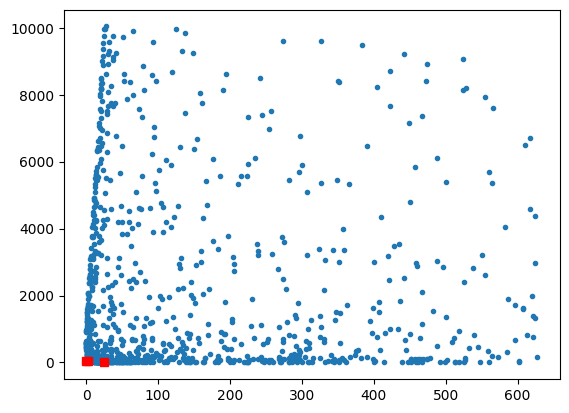

In [21]:
# creación de los puntos al azar
n = 10**3
z = np.zeros((n,2))
for i in range(n):
  x = np.random.uniform(-5,5,2)
  rs = fun1(x)
  z[i,0] = rs[0]
  z[i,1] = rs[1]

# grafica
plt.plot(z[:,0],z[:,1],'.')
plt.plot(0,50,'sr')
plt.plot(2,32,'sr')
plt.plot(25,5,'sr')
#plt.plot(200,50,'sr')
plt.show()

In [22]:
# funcion de suma de pesos
def g(x,F,alp):
  va = np.array([1-alp,alp])
  return np.dot(F(x),va)

# prueba para diferentes valores de alpha
print( g(np.array([1,1]),fun1,0) )
print( g(np.array([1,1]),fun1,1) )
print( g(np.array([1,1]),fun1,0.5) )

2.0
272.0
137.0


In [23]:
# gradiente de f
def Gf(x,alp):
  return np.array([4*alp*x[0]**3+(2*x[0]- 10)*(1 - alp), (1 - alp)*(4*x[1]**3 - 60*x[1]**2 + 300*x[1]- 500)])

# Hesiana de f
def Hf(x,alp):
  return np.array([[12*alp*x[0]**2+2*(1-alp),0],[0,(1 - alp)*(12*x[1]**2 - 120*x[1]+300)]])

# Método de Newton
def Newton(x,G,H,alp,n=10):
  for i in range(n):
    x = x - np.dot(np.linalg.inv(H(x,alp)),G(x,alp))
  return x

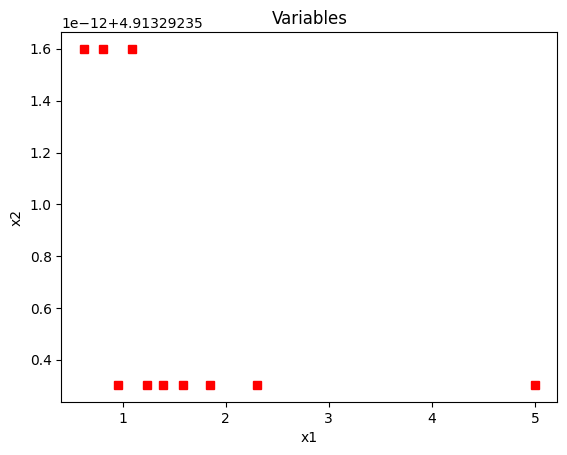

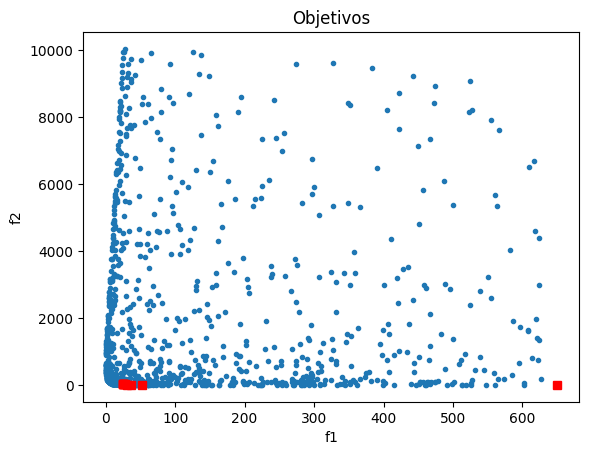

[[5.         4.91329235]
 [2.2991652  4.91329235]
 [1.84741904 4.91329235]
 [1.58526308 4.91329235]
 [1.39333541 4.91329235]
 [1.23477283 4.91329235]
 [1.09212681 4.91329235]
 [0.9535751  4.91329235]
 [0.80631012 4.91329235]
 [0.62411479 4.91329235]]


In [25]:
# Calculamos 10 puntos
sols = np.zeros((10,2))
Fs = np.zeros((10,2))

# Método de Newton para cada peso
for (i,a) in enumerate(np.arange(0,1,0.1)):
  x = Newton(np.array([0,0]),Gf,Hf,a)
  sols[int(a*10),:] = x
  Fs[i,:] = fun1(x)


# grafica de las variables
plt.plot(sols[:,0],sols[:,1],'sr')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Variables')
plt.show()

# espacio entre gráficas
print()

# grafica de los objetivos
plt.plot(z[:,0],z[:,1],'.')
plt.plot(Fs[:,0],Fs[:,1],'sr')
plt.title('Objetivos')
plt.xlabel('f1')
plt.ylabel('f2')
plt.show()

print(sols)